# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
!pip install ./python
!pip install progressbar

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
## when running in Udacity workspace
# env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

## when running locally
env = UnityEnvironment(file_name='Reacher_20.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 4. Train PPO Agent!

When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from PPO_agent import Agent
import progressbar as pb
import torch
import os
import numpy as np
import replay_buffer
import time

# create agent
agent = Agent(num_agents, state_size, action_size, random_seed=0) # 33, 4

# if os.path.exists('checkpoint_ppo.pth'):
#     checkpoint = torch.load('checkpoint_ppo.pth')
#     agent.policy.load_state_dict(checkpoint['policy'])

In [6]:
# keep track of how long training takes
# WARNING: running through all 800 episodes will take 30-45 minutes

# max steps
tmax = 1001
# start from step num
nrand = 1
# record rewards
mean_rewards = []
average_list = []

Episode 110	 Last Average Score: 39.18

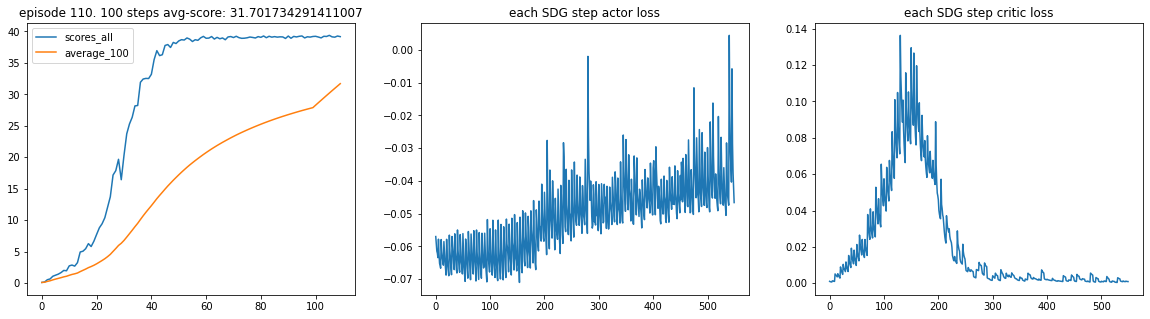

Solved Agent at 110 episode 	Last 100 epsiodes Average Score: 31.70
Total use time is 1412.284204006195 second


In [7]:
# training loop max iterations
episodes = 500
starttime = time.time()

widget = ['training loop: ', pb.Percentage(), ' ', 
          pb.Bar(), ' ', pb.ETA() ]
timer = pb.ProgressBar(widgets=widget, maxval=episodes).start()

for i_episode in range(episodes):

    # collect trajectories
    old_probs, states, actions, rewards, value_list, terminate_list, last_states  = \
        replay_buffer.collect_trajectories(env, agent, tmax, nrand=nrand)

    total_rewards = np.sum(rewards, axis=0)

    # train agent
    agent.step(old_probs, states, actions, rewards, value_list, terminate_list, last_states)
    
    # get the average reward
    mean_rewards.append(np.mean(total_rewards))
    average_list.append(np.mean(mean_rewards[-100:]))
    
    print('\rEpisode {}\t Last Average Score: {:.2f}'.format(i_episode + 1, mean_rewards[-1]), end="")
    if (i_episode + 1) % 10 == 0:
        clear_output(True)
        print('\rEpisode {}\t Last Average Score: {:.2f}'.format(i_episode + 1, mean_rewards[-1]), end="")
        plt.figure(figsize=(20, 5))
        plt.subplot(131)
        plt.title('episode %s. 100 steps avg-score: %s' % (i_episode + 1, average_list[-1]))
        plt.plot(mean_rewards, label='scores_all')
        plt.plot(average_list, label='average_100')
        plt.legend()
#         plt.subplot(132)
#         plt.title('each SDG step loss')
#         plt.plot(agent.common_loss)
        plt.subplot(132)
        plt.title('each SDG step actor loss')
        plt.plot(agent.agent_loss_a)
        plt.subplot(133)
        plt.title('each SDG step critic loss')
        plt.plot(agent.agent_loss_c)
        plt.show()
        # update progress widget bar
        timer.update(i_episode + 1)
    
    if (i_episode+1) % 50 == 0:
        torch.save({
            'policy': agent.policy.state_dict(),
            }, 'checkpoint_ppo.pth')
    
    if average_list[-1] > 30 and i_episode>=100 and (i_episode+1)%10 == 0:
        usetime = time.time() - starttime
        print('\rSolved Agent at {} episode \tLast 100 epsiodes Average Score: {:.2f}'.format(i_episode+1, average_list[-1]))
        print('\rTotal use time is {} second'.format(usetime))
        break
        
timer.finish()

### Save Model

In [8]:
torch.save({
            'policy': agent.policy.state_dict(),
            }, 'checkpoint_ppo.pth')
# pick device
# torch.load('xxx.pkl', map_location='cpu')
# torch.load('gen_500000.pkl', map_location=lambda storage, loc: storage.cuda(1))

### Watch Agent
watch agent performance by local environment

In [10]:
new_agent = Agent(num_agents, state_size, action_size, random_seed=0) # 33, 4
checkpoint = torch.load('checkpoint_ppo_ac.pth', map_location='cpu')
new_agent.policy.load_state_dict(checkpoint['policy'])

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
max_step = 0
while True:
    prediction = new_agent.act(states)                 # select an action (for each agent)
    actions = prediction['action'].cpu().numpy()
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    max_step += 1
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
print('Total steps num: {}'.format(max_step))

Total score (averaged over agents) this episode: 39.00949912806973
Total steps num: 1001
